#Feature engineer

### Data Upsampling

In [ ]:
# Missing value imputation
from sklearn.impute import SimpleImputer
imp_mode=SimpleImputer(strategy='most_frequent')
imp_mode_num=SimpleImputer(strategy='most_frequent')
imp_median=SimpleImputer(strategy='median')

In [ ]:
for i in x_train.columns:
    if (x_train[i].dtype.name!='object')&(x_train[i].nunique()<=3):
        imp_mode_num.fit(np.array(x_train[i]).reshape(-1,1))
        x_train[i]=imp_mode_num.transform(np.array(x_train[i]).reshape(-1,1))
        x_test[i]=imp_mode_num.transform(np.array(x_test[i]).reshape(-1,1))
    elif (x_train[i].dtype.name!='object')&(x_train[i].nunique()>3):
        imp_median.fit(np.array(x_train[i]).reshape(-1,1))
        x_train[i]=imp_median.transform(np.array(x_train[i]).reshape(-1,1))
        x_test[i]=imp_median.transform(np.array(x_test[i]).reshape(-1,1))
    else:
        imp_mode.fit(np.array(x_train[i]).reshape(-1,1))
        x_train[i]=imp_mode.transform(np.array(x_train[i]).reshape(-1,1))
        x_test[i]=imp_mode.transform(np.array(x_test[i]).reshape(-1,1))

In [ ]:
x_train.isnull().sum()

Patient Age                                         0
Genes in mother's side                              0
Inherited from father                               0
Maternal gene                                       0
Paternal gene                                       0
Blood cell count (mcL)                              0
Mother's age                                        0
Father's age                                        0
Status                                              0
Respiratory Rate (breaths/min)                      0
Heart Rate (rates/min                               0
Follow-up                                           0
Gender                                              0
Birth asphyxia                                      0
Autopsy shows birth defect (if applicable)          0
Folic acid details (peri-conceptional)              0
H/O serious maternal illness                        0
H/O radiation exposure (x-ray)                      0
H/O substance abuse         

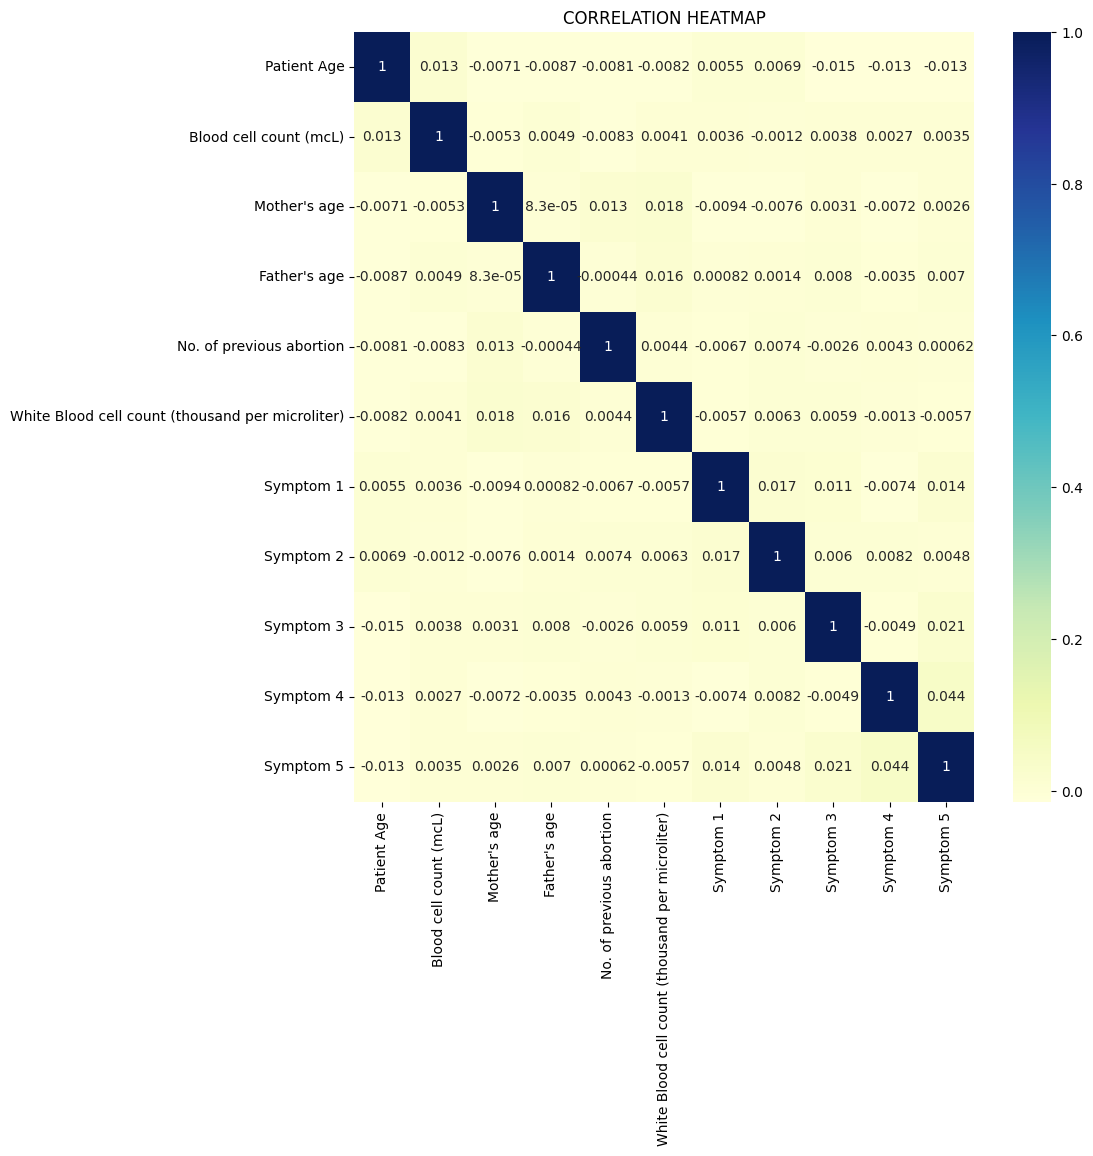

In [ ]:
# plotting correlation heatmap
plt.figure(figsize=(10, 10))
dataplot = sns.heatmap(x_train.corr(), cmap="YlGnBu", annot=True)
plt.title('CORRELATION HEATMAP')
plt.show()

#### Creating New Features

In [ ]:
# we are creating majority vote for symptoms as a feature
# in which we will find if 3 or more symptoms feature have 0 then it will be 0 as a majority vote
# if 3 or more symptoms have 1 then it will be 1 as a majority vote

symptoms = ['Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4','Symptom 5']
symptoms_majority_train = []
# it will iterate through the data set
for index, row in x_train.iterrows():
    # will get unique element and it counts from the all symptom columns
    # it will also sort values by index like 0 and 1
    # index zero will 0 and index one will 1
    unique_elements = row.loc[symptoms].value_counts().sort_index()
    # this will take only values from the unique_elements
    values = unique_elements.values
    # index zero is for 0
    # if it is equal or greater than 3 then it will append 0 to majority vote
    if values[0] >= 3: # index zero is for 0 value counts
        symptoms_majority_train.append(0)

    # if it is equal or greater than 3 then it will append 1 to majority vote
    elif values[1] >= 3: # index zero is for 1 value counts
        symptoms_majority_train.append(1)

# it will do same for test data
symptoms_majority_test = []
for index, row in x_test.iterrows():
    unique_elements = row.loc[symptoms].value_counts().sort_index()
    values = unique_elements.values
    if values[0] >= 3:
        symptoms_majority_test.append(0)

    elif values[1] >= 3:
        symptoms_majority_test.append(1)

Text(0.5, 1.0, 'Symptoms majority vote')

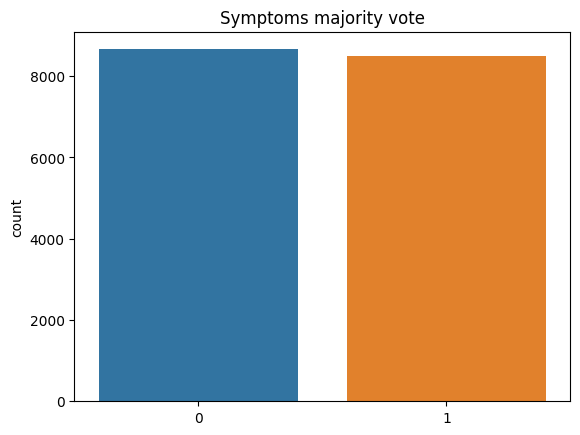

In [ ]:
sns.countplot(x= symptoms_majority_train)
plt.title('Symptoms majority vote')

In [ ]:
x_train['symptoms_majority'] = symptoms_majority_train
x_test['symptoms_majority'] = symptoms_majority_test

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# here we are generating additional feature from the addition feature
# we are converting continuous feature to bins
# with the help of decision tree classifier we can create bins by setting max depth as 2

# here max depth 2 will create 4 bins
tree_model = DecisionTreeClassifier(max_depth=12)
# fiting the continuous feature and target
tree_model.fit(x_train['White Blood cell count (thousand per microliter)'].to_frame(), target_1)
# this will create new column and store bin values in it
x_train['bin_white_blood']=tree_model.predict_proba(x_train['White Blood cell count (thousand per microliter)'].to_frame())[:,1]
x_test['bin_white_blood']=tree_model.predict_proba(x_test['White Blood cell count (thousand per microliter)'].to_frame())[:,1]

x_train.head(3)

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,symptoms_majority,bin_white_blood
0,2.0,Yes,No,Yes,No,4.760603,35.0,42.0,Alive,Normal (30-60),...,Singular,9.857562,slightly abnormal,1.0,1.0,1.0,1.0,1.0,0,0.099446
2,6.0,Yes,No,No,No,4.893297,41.0,22.0,Alive,Normal (30-60),...,Singular,7.461071,normal,0.0,1.0,1.0,1.0,1.0,1,0.099446
3,12.0,Yes,No,Yes,No,4.705280,21.0,42.0,Deceased,Tachypnea,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,0,0.099446


In [ ]:
pd.concat( [x_train.groupby(['bin_white_blood'])['White Blood cell count (thousand per microliter)'].min(),
            x_train.groupby(['bin_white_blood'])['White Blood cell count (thousand per microliter)'].max()], axis=1)

,White Blood cell count (thousand per microliter),White Blood cell count (thousand per microliter)
bin_white_blood,,
0.000000,3.001457,11.999857
0.031250,4.764815,4.790257
0.041667,3.688942,3.802694
0.047619,4.517378,4.529178
0.050000,3.440977,3.479336
0.054054,3.593531,3.630831
0.058824,11.429456,11.450512
0.071429,3.500506,3.513154
0.085714,3.525327,3.569369


In [ ]:
# here we are generating additional feature from the addition feature
# we are converting continuous feature to bins
# with the help decision tree classifier we can create bins by setting max depth as 2

# here max depth 2 will create 4 bins
tree_model = DecisionTreeClassifier(max_depth= 12)
# fiting the continuous feature and target
tree_model.fit(x_train['Blood cell count (mcL)'].to_frame(), target_1)
# this will create new column and store bin values in it
x_train['bin_blood_cell_count']=tree_model.predict_proba(x_train['Blood cell count (mcL)'].to_frame())[:,1]
x_test['bin_blood_cell_count']=tree_model.predict_proba(x_test['Blood cell count (mcL)'].to_frame())[:,1]

x_train.head(3)

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),...,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,symptoms_majority,bin_white_blood,bin_blood_cell_count
0,2.0,Yes,No,Yes,No,4.760603,35.0,42.0,Alive,Normal (30-60),...,9.857562,slightly abnormal,1.0,1.0,1.0,1.0,1.0,0,0.099446,0.097835
2,6.0,Yes,No,No,No,4.893297,41.0,22.0,Alive,Normal (30-60),...,7.461071,normal,0.0,1.0,1.0,1.0,1.0,1,0.099446,0.133261
3,12.0,Yes,No,Yes,No,4.705280,21.0,42.0,Deceased,Tachypnea,...,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,0,0.099446,0.097835


In [ ]:
pd.concat( [x_train.groupby(['bin_blood_cell_count'])['Blood cell count (mcL)'].min(),
            x_train.groupby(['bin_blood_cell_count'])['Blood cell count (mcL)'].max()], axis=1)

,Blood cell count (mcL),Blood cell count (mcL)
bin_blood_cell_count,,
0.000000,4.146230,5.609829
0.054054,4.777154,4.778323
0.074970,4.938048,4.961895
0.076923,4.778349,4.778981
0.078125,4.935158,4.937239
0.082474,4.773370,4.776598
0.090909,4.542021,4.543770
0.097835,4.575425,4.773350
0.100000,4.215599,4.280350


####Train test split

In [ ]:
#Splitting the data
from sklearn.model_selection import train_test_split

x_train1,x_val1,y_train1,y_val1= train_test_split(x_train, target_1, stratify= target_1, test_size=0.10)

x_train1.shape, x_val1.shape, y_train1.shape, y_val1.shape

((15444, 33), (1716, 33), (15444,), (1716,))

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler

#### Feature Encoding

In [ ]:
# we are performing encoding after spliting to avoid data leakage
# we are doing onehotencoding to categorical feature
# as well standard scaling to numerical feature beacause most of the numerical features are normally distribiuted

train_data=  pd.DataFrame()
val_data = pd.DataFrame()
test_data = pd.DataFrame()

# for every columns in the data
for i in x_train1.columns:
    # if the feature is object
    if (x_train1[i].dtype.name=='object'):
        ohe=OneHotEncoder()
        ohe.fit(np.array(x_train1[i]).reshape(-1, 1))
        train1 = pd.DataFrame(ohe.transform(np.array(x_train1[i]).reshape(-1, 1)).toarray(), columns = ohe.get_feature_names_out([i]))
        val1 = pd.DataFrame(ohe.transform(np.array(x_val1[i]).reshape(-1, 1)).toarray(), columns = ohe.get_feature_names_out([i]))
        test1 = pd.DataFrame(ohe.transform(np.array(x_test[i]).reshape(-1, 1)).toarray(), columns =ohe.get_feature_names_out([i]))

    else:
        # if the feature has numerical values then it will do standard scaling
        scale=StandardScaler()
        scale.fit(np.array(x_train1[i]).reshape(-1, 1))
        train1 = pd.DataFrame(scale.transform(np.array(x_train1[i]).reshape(-1, 1)), columns = scale.get_feature_names_out([i]))
        val1 = pd.DataFrame(scale.transform(np.array(x_val1[i]).reshape(-1, 1)), columns = scale.get_feature_names_out([i]))
        test1 = pd.DataFrame(scale.transform(np.array(x_test[i]).reshape(-1, 1)), columns = scale.get_feature_names_out([i]))
    # concatinating the encoded data
    train_data = pd.concat([train_data, train1], axis=1)
    val_data = pd.concat([val_data, val1], axis=1)
    test_data = pd.concat([test_data, test1], axis=1)



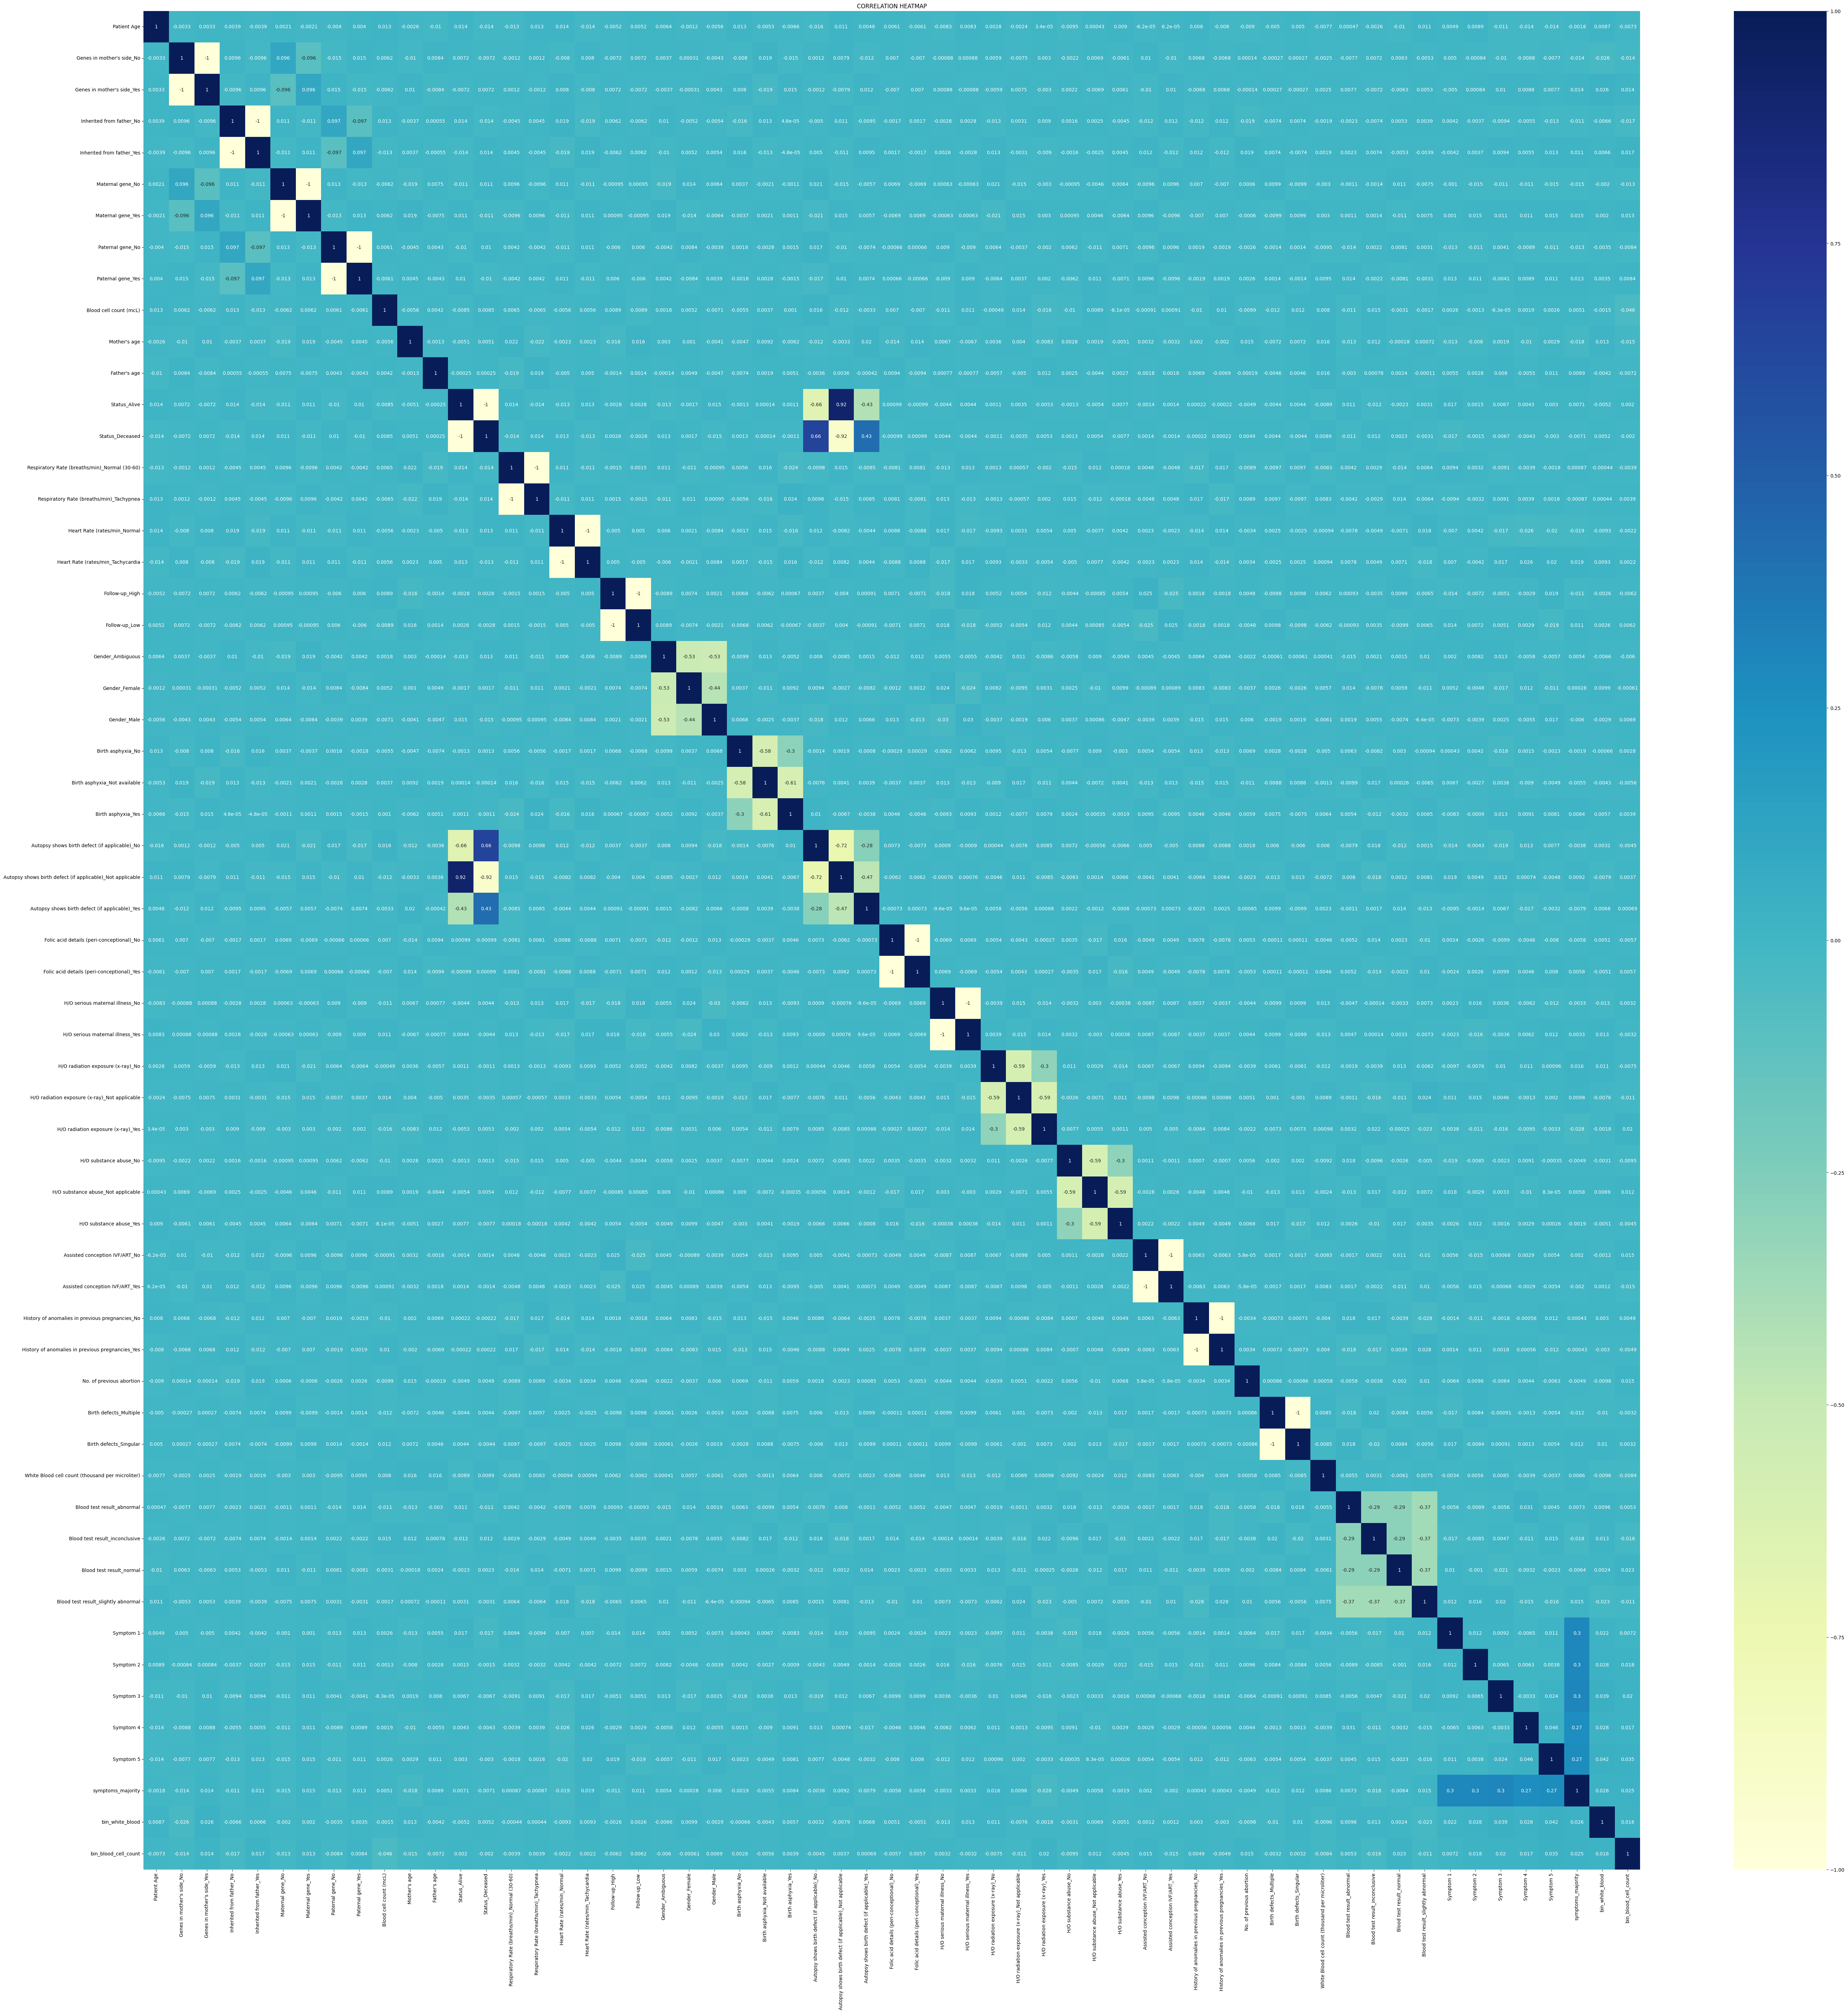

In [ ]:
# plotting correlation heatmap
plt.figure(figsize=(70, 70))
dataplot = sns.heatmap(train_data.corr(), cmap="YlGnBu", annot=True)
plt.title('CORRELATION HEATMAP')
plt.show()

In [ ]:
train_data.shape, val_data.shape, test_data.shape

((15444, 59), (1716, 59), (9290, 59))

#### Label Encoding

In [ ]:
le = LabelEncoder()
y_train_en_1 = le.fit_transform(y_train1)

le= LabelEncoder()
y_val_en_1 = le.fit_transform(y_val1)

#### Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest,chi2,mutual_info_classif

k_best=SelectKBest(mutual_info_classif, k=30).fit(train_data,y_train_en_1)

cols=k_best.get_support(indices=True)
print(train_data.iloc[:,cols].shape)
train_kbest1=train_data.iloc[:,cols]
val_kbest1=val_data.iloc[:,cols]

(15444, 30)


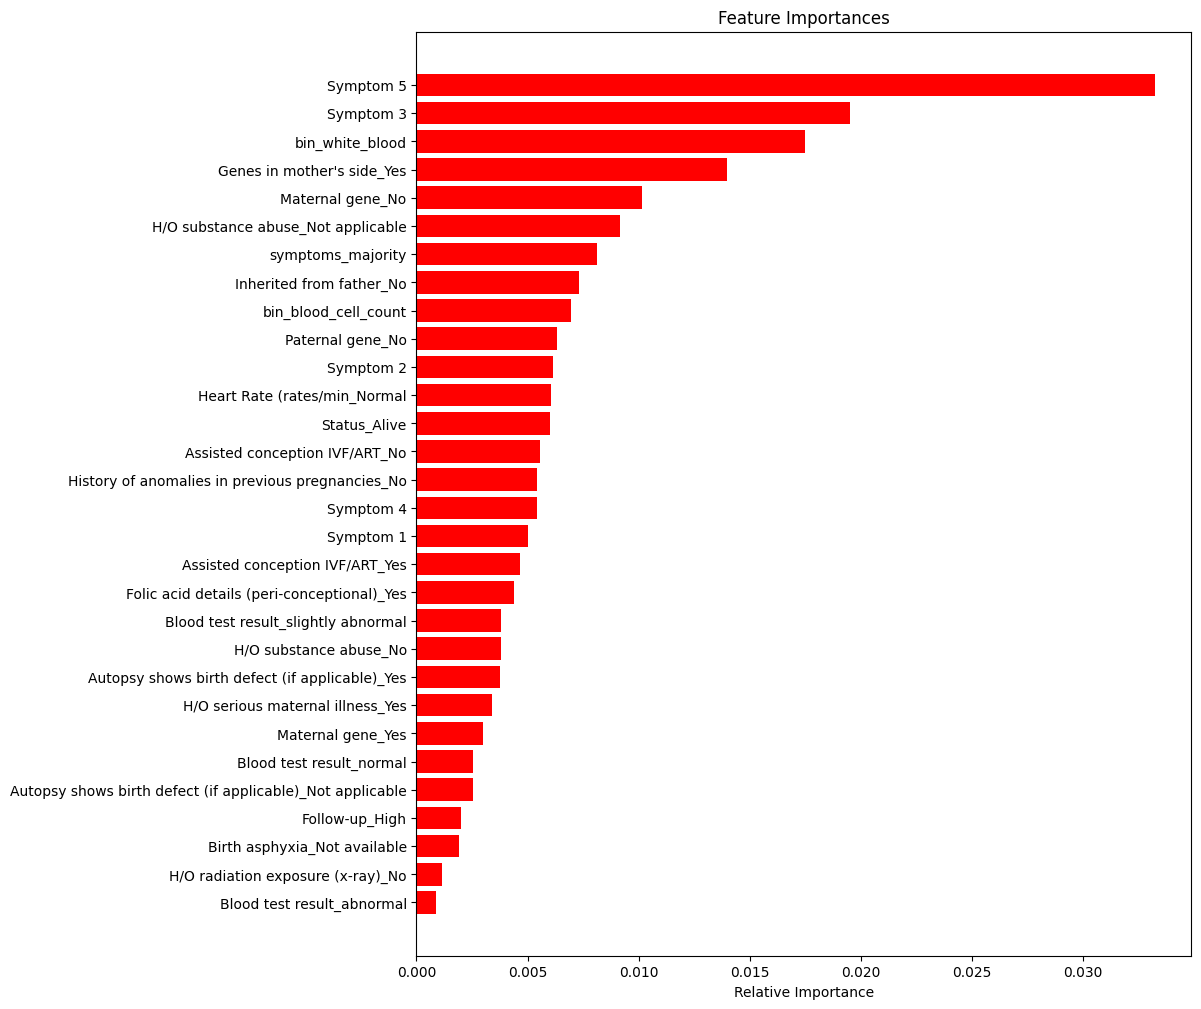

In [ ]:
features = train_data.columns
importances = k_best.scores_
indices = (np.argsort(importances))[-30:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Upsampling data


In [ ]:
# with borderline smote we will upsample minority class
from imblearn.over_sampling import BorderlineSMOTE
sm = BorderlineSMOTE(random_state=42)
# it will return 2 variables
x_train_smote1, y_train_smote1 = sm.fit_resample(train_kbest1, pd.DataFrame(y_train_en_1))
print(f'''shape of X before SMOTE: {train_kbest1.shape}
shape of X after SMOTE: {x_train_smote1.shape}''')

# validation smote
sm = BorderlineSMOTE(random_state=42)
x_val_smote1, y_val_smote1 = sm.fit_resample(val_kbest1, pd.DataFrame(y_val_en_1))

shape of X before SMOTE: (15444, 30) 
shape of X after SMOTE: (23667, 30)


Text(0.5, 1.0, 'Genetic Disorder')

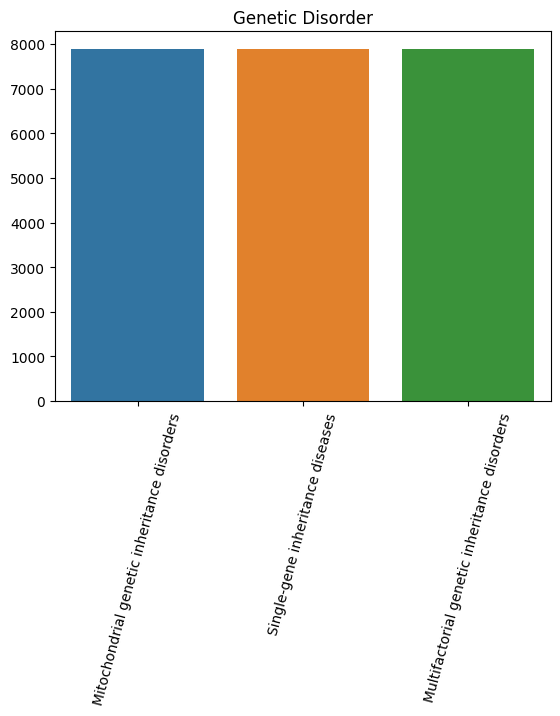

In [ ]:
fig, ax= plt.subplots()

values = y_train_smote1.value_counts()
sns.barplot(x= y_train1.unique(), y= values.values, ax = ax)
ax.set_xticklabels(rotation = 75, labels = y_train1.unique())
ax.set_title(y_train1.name)